# Programming Assignment - 1
---

## Question 1 
Write a function trace1D() that finds the trace of a matrix given by a one dimensional NumPy array. You can not use the built-in function np.trace() or any other builtin function in any way. 

Display the output of the follwing
print(“Trace of the suggested matrix is: {}”.format(trace1D(np.arange(0,100,1))))

In [9]:
# import statements
import numpy as np
import math
import sys

# Write your function here
def trace1D(mat1D):
    array_len = mat1D.shape[0]
    print("You have provided an array of length ",array_len)
    n = math.ceil (math.sqrt(array_len))
    
    # Check if you have sufficient number of elements to form a square matrix
    if n > math.sqrt(array_len):
        # sys.exit(message) raises an exception too
        print("Please provide sufficient number of elements for a square matrix. System exit.")
        sys.exit()
    
    # Sum of the elements that will appear in the diagonal to give the trace
    sum = 0.0
    for k in range(n):
        # In a 1D matrix representation, the diagonal elements will appear
        # at the 1st element, the 1 + (n + 1)st element, the 1 + 2 (n + 1)st element, etc.
        # Subtract 1 for zero-indexing.
        sum += mat1D[(n + 1) * k]
    return sum
    

In [10]:
# Show the output of the following
print("Trace of the suggested matrix is: {}".format(trace1D(np.arange(0,100,1))))

You have provided an array of length  100
Trace of the suggested matrix is: 495.0


## Question 2

Read an appropriate RGB-image of your choice in a 3-D Tensor named myRGB. 

Perform the following operations on this tensor: 

(A) Pad the image by 50 pixels on all sides. This operation is akin to putting  a dark frame around the image. Display this RGB image.

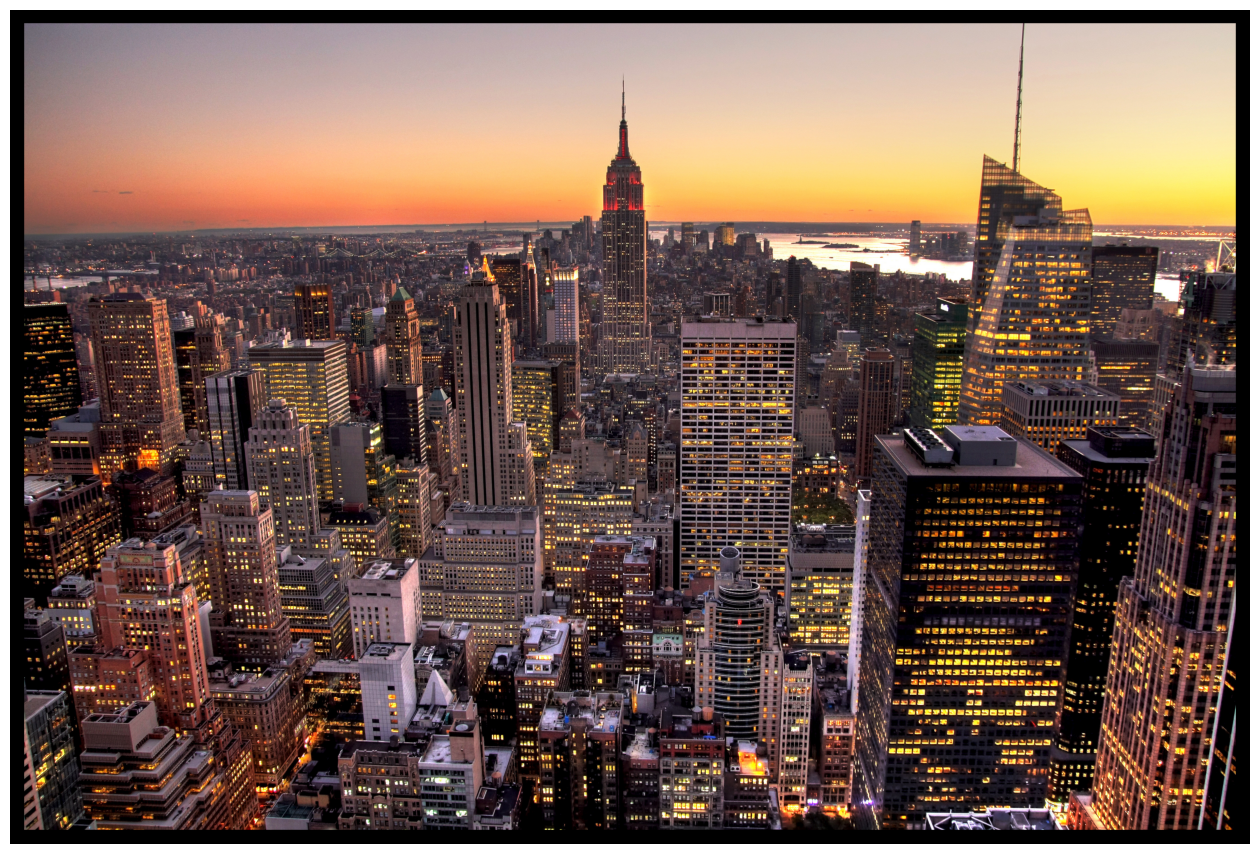

In [11]:
# Follow the example from class. Modify it to the case of color images.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
myRGB = mpimg.imread("./images/city.jpeg")
y, x, rgb = myRGB.shape
# Not setting dtype to uint8 messes with the colors
tmp = np.zeros((y + 100, x + 100, 3), dtype=np.uint8)
tmp[50: y + 50, 50: x + 50, :] = myRGB.copy()
plt.figure(figsize=(16,32))
plt.axis('off')
plt.imshow(tmp)
plt.show()

(B) Use a sliding window of a 3x3 matrix, K (referred to as a kernel), to perform an operation called convolution on the original image. Display some of these images after convolution. 

Note that you only need to use appropriate slicing of the source image, element wise product, and np.sum in loops to perform this. 

Display the images after convolutions using K=[1 0 -1;0 0 0;-1 0 1] and K = [0 -1 0; -1 4 -1; 0 -1 0]. Describe what these convolutions have achieved. 

To know more about convolution and how to achieve it, read Section 9.2 in https://www.deeplearningbook.org/contents/convnets.html.

Here is another resource on convolution: https://developer.apple.com/library/archive/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

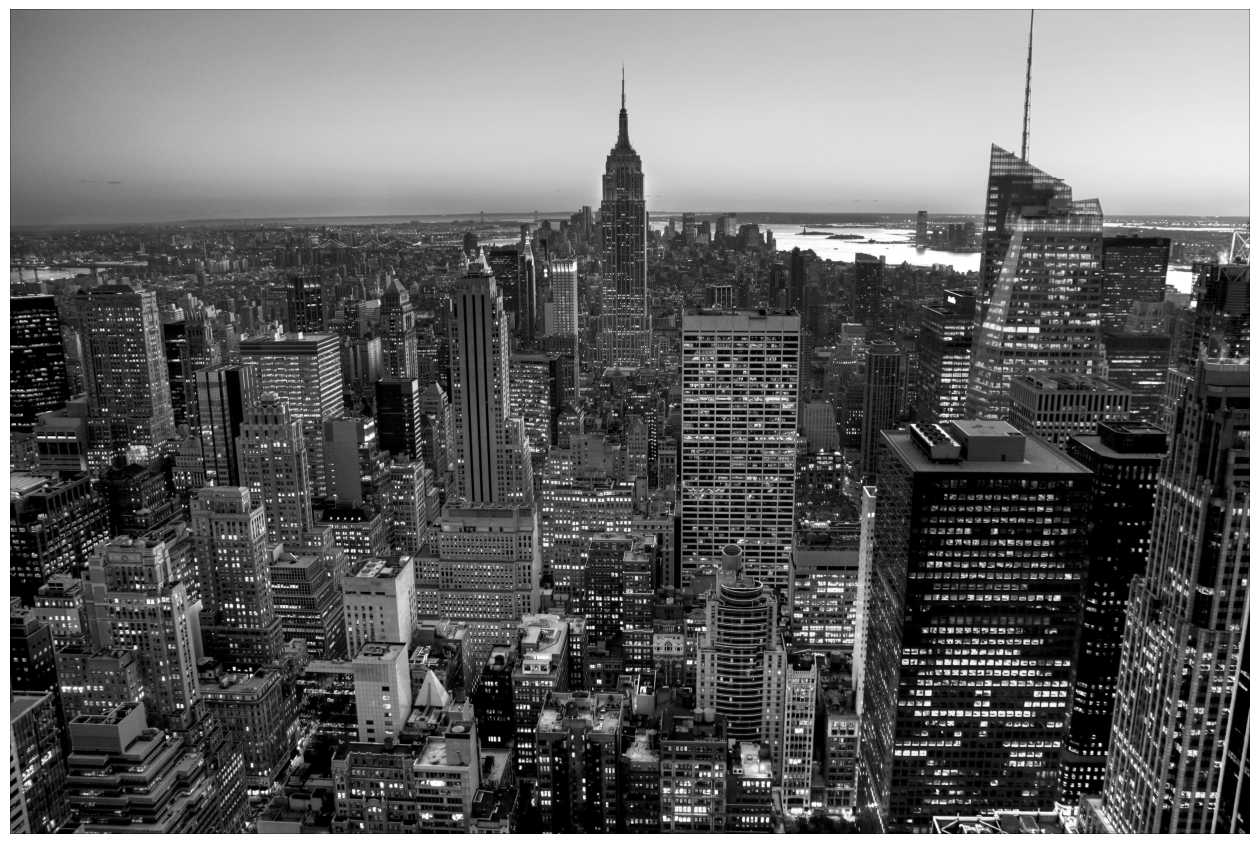

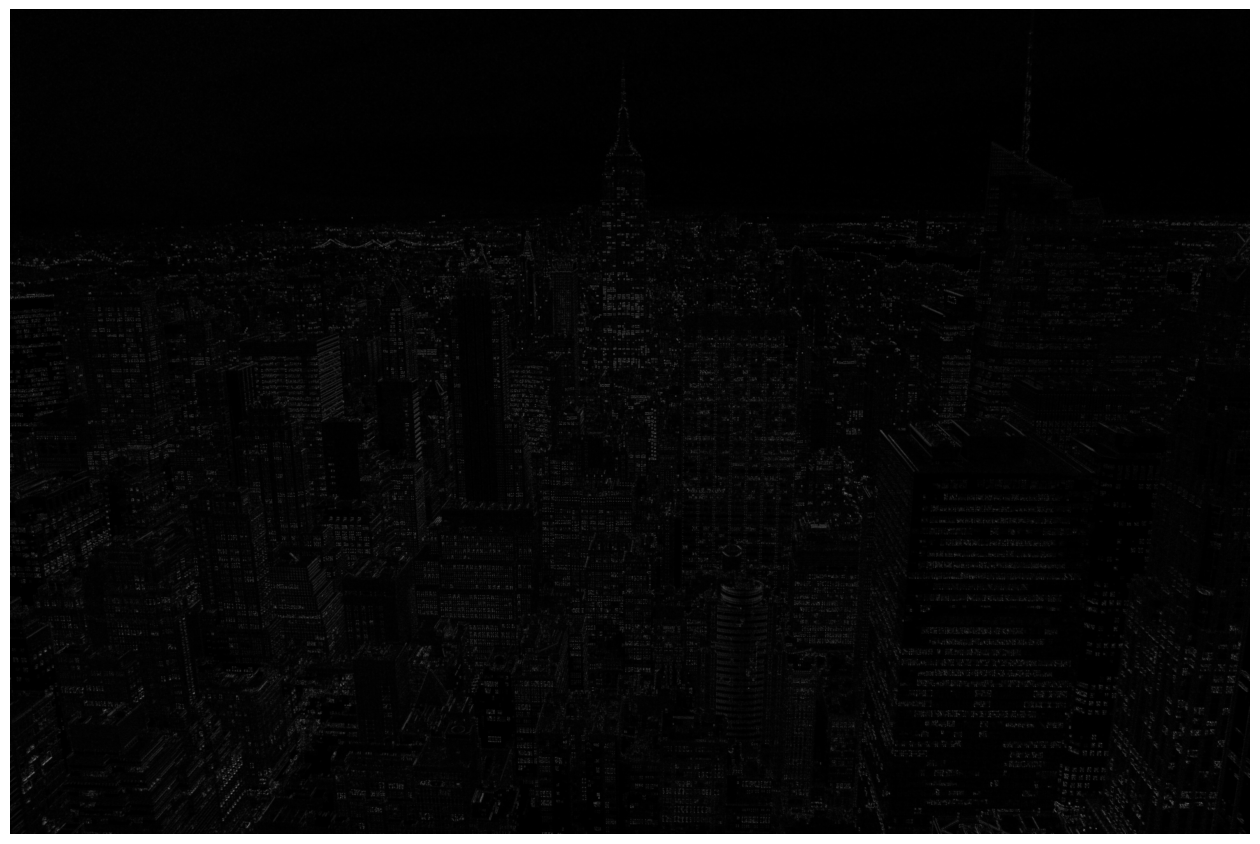

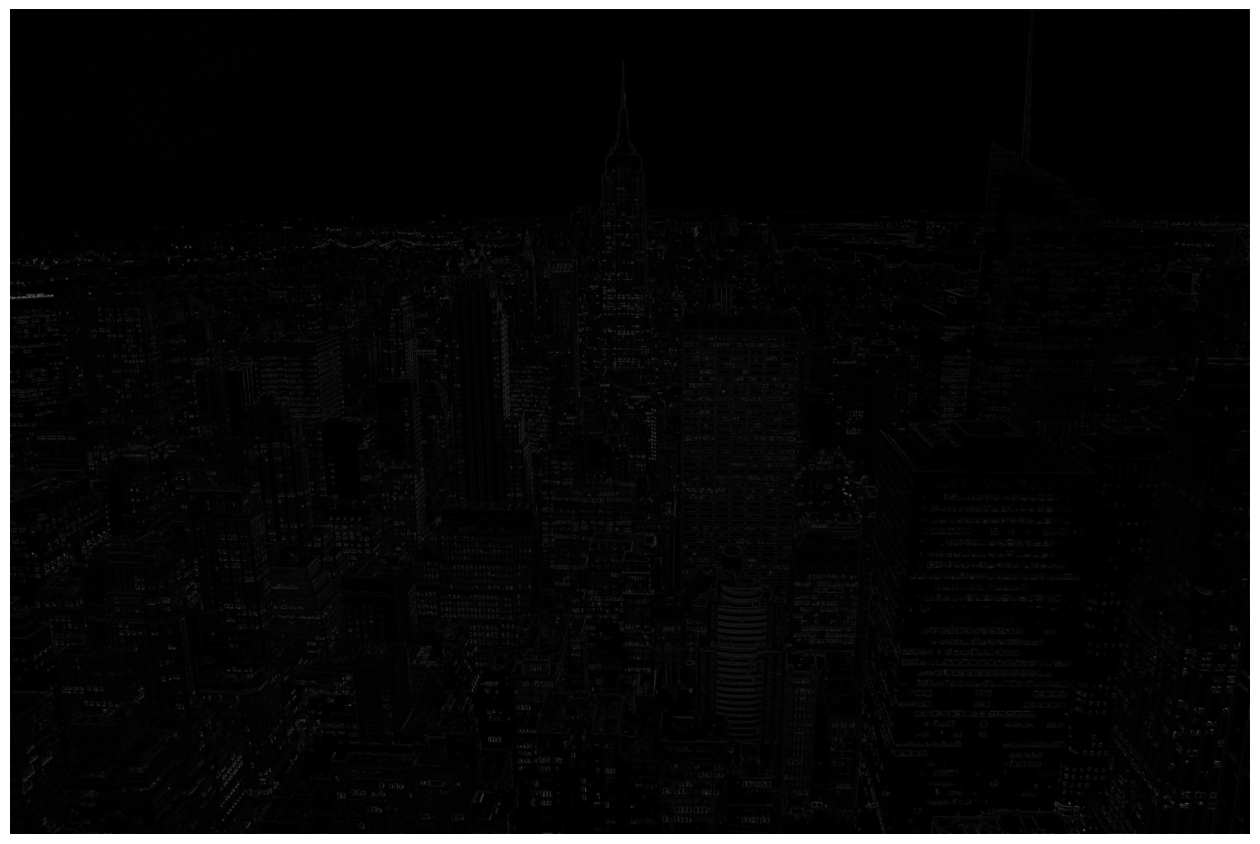

In [12]:
## From motivating examples
## Converting a color image to a black-n-white

from PIL import Image
color_weight = [0.2125, 0.7154, 0.0721]
# Work with a B&W image.
myGray = np.dot(myRGB[...,0:3], color_weight) # convert myRGB to monochromic
# Create a padded image from myGray by padding one pixel on all sides. Why?
# Why? Because the kernel cannot be applied to the edge of the matrix, because
# then the slices will go out of bounds
myGray_padded = np.zeros((myGray.shape[0] + 2, myGray.shape[1] + 2), dtype=np.int16) # Do it on myGray a B&W image
myGray_padded[1:myGray.shape[0] + 1, 1: myGray.shape[1] + 1] = myGray.copy()

# If the convoluted image is called myGray_conv
myGray_conv1 = np.zeros_like(myGray, dtype = np.int16)
myGray_conv2 = np.zeros_like(myGray, dtype = np.int16)


plt.figure(figsize=(16,32))
plt.axis('off')
plt.imshow(np.abs(myGray_padded), cmap="gray")
plt.show()

# Python code for convolution that needs modification by you.
m, n = myGray.shape # Find dimension of the image
K = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]]) # Take appropriate Kernel
for i in range(m):
    for j in range(n):
        # Take appropriate slice of myGray_padded to get a (3x3) window on the image
        myGray_window = myGray_padded[i: i + 3, j: j + 3] # Your code here
        # CODE for finding the i,j-th pixel on the convoluted image
        myGray_conv1[i,j] = np.sum(np.multiply(myGray_window, K)) # Your code here

plt.figure(figsize=(16,32))
plt.axis('off')
plt.imshow(np.abs(myGray_conv1), cmap="gray")
plt.show()

m, n = myGray.shape # Find dimension of the image
K = np.array([[0, -1, 0], [-1, 4, -1],[0, -1, 0]]) # Take appropriate Kernel
for i in range(m):
    for j in range(n):
        # Take appropriate slice of myGray_padded to get a (3x3) window on the image
        myGray_window2 = myGray_padded[i: i + 3, j: j + 3] # Your code here
        # CODE for finding the i,j-th pixel on the convoluted image
        myGray_conv2[i,j] = np.sum(np.multiply(myGray_window2, K)) # Your code here
# Display the convoluted image

plt.figure(figsize=(16,32))
plt.axis('off')
plt.imshow(np.abs(myGray_conv2), cmap="gray")
plt.show()


## Question 3
IRIS flower dataset is one of the widely used resources. Load the IRIS data by using the code below. 
Normalize this data by using z-scoring (z  = (x - x_mean)/std). Don't use loops. You can use np.mean(), np.std() and basic matrix operation with broadcasting. Visualize the distribution of this data using Matplotlib or other packages. 

In [13]:
# Python code
from sklearn import datasets
iris = datasets.load_iris().data

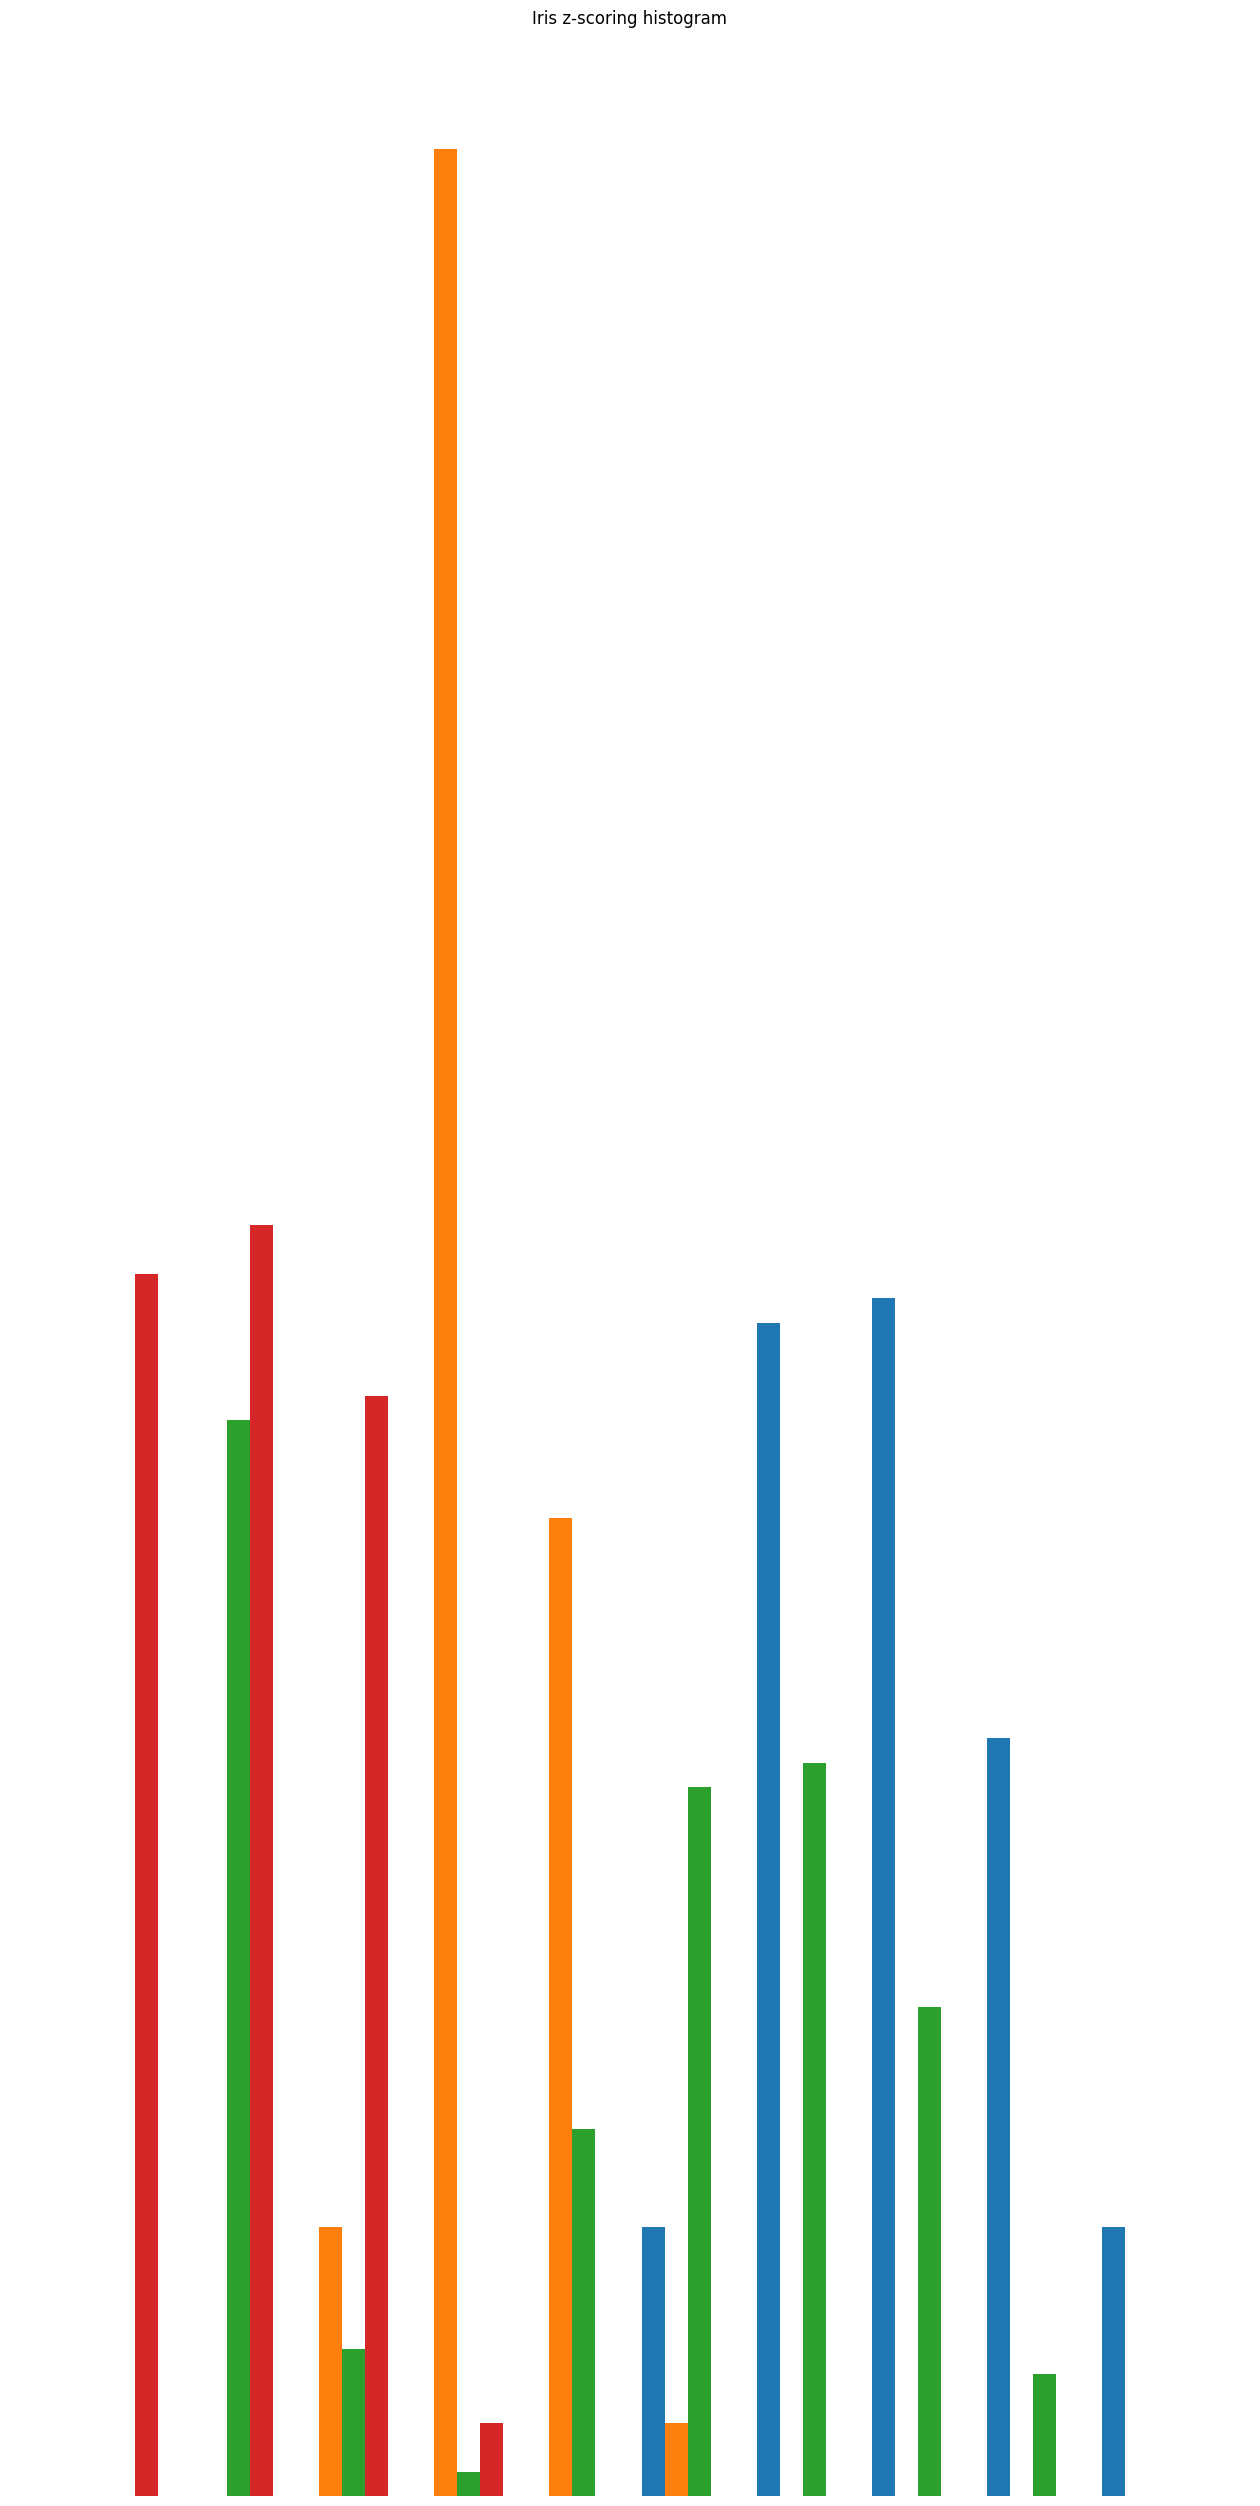

In [14]:
# Your code here

z = (iris - np.mean(iris))/np.std(iris)
plt.figure(figsize=(16,32))
plt.axis('off')
plt.hist(z, bins=10)
plt.gca().set(title="Iris z-scoring histogram", ylabel="Frequency")
plt.show()

## Question 4
Modify the textual data example from NB1 to convert the document-term matrix into TF-IDF (term-frequency inverse document frequency) matrix by using basic NumPy operations.
> **Term-frequency (TF)** (of a word in a document) is frequency of the word in a document divided by total number of words in the document.

> **Inverse document frequency (IDF)** of a word (all documents under consideration) is the natural log of (total number of documents/number of documents having the given word).
$$\text{tf-idf}(t, d) = \text{tf}(t,d) \cdot \text{idf}(t) $$
See the discussion for an example

Display the dense output for the tf-idf matrix for the example from NB1 MA544.ipynb.

In [15]:
# Copy and past the code from NB1 to create term-document matrix
# Please note that I have not been able to install ScikitLearn on my computer (Mac M1). 
# But this code should run on yours.
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

vectorizer = CountVectorizer()

document1 = " I bought this game as a gift for my 8 year old daughter who loves games. I was expecting lots of gross foods--but I was surprised at the inappropriate cards--eyeball, human burger, blood salsa, and fresh brains. Those are not foods that typical people find in their refrigerators. We do not practice cannibalism. She was very upset when I suggested that we just take out those cards. I seriously wonder who thinks that those cards are appropriate for kids. The rest of the game is funny, but I wish I would have looked through the cards before I gave it to her."
document2 = "Absolutely love Taco vs burrito. I️ bought it as a kickstarter. I️ originally bought this game because my husband and I️ love to play games with friends but most of them are not targeted to children so I️ got this to add to our collection so we had options when our friends with kids came. I’m not gonna lie I️ did No have high expectations for this to be a game for adult but I️ was Sooooo wrong!!!!!! We have now played with several different groups of friends and it’s a hit!!!!! With adults it becomes a major strategy game. I️ have Now bought it as a Christmas present bc it was so well received!!!!"
document3 = " Unlike several of the reviewers here, I didn't purchase this originally for when kids are around. I bought it because of the reviews that said the adults all loved it too! I'm always on the lookout for games playable by 2 people and this was a great one. It's incredibly simple, but brings a lot of laughs with the competition and sabotage. I'm really glad I gave this game a chance."
doc_list = [document1, document2, document3]
# Fit a bag of words
bow = vectorizer.fit_transform(doc_list)
tdMat = bow.toarray()

In [16]:
# Your code for TF 
tf = np.zeros(tdMat.shape)
tf[0] = tdMat[0] / np.sum(tdMat[0])
tf[1] = tdMat[1] / np.sum(tdMat[1])
tf[2] = tdMat[2] / np.sum(tdMat[2])
# Your code for IDF
idf = np.log(np.divide(3, np.sum(tdMat > 0, 0)))

In [17]:
# Find TF-IDF matrix 
tfidf = np.multiply(tf, idf)
# Display the dense output for the example from NB1
print(tfidf)

[[0.         0.         0.         0.         0.         0.
  0.         0.01168736 0.         0.         0.00431346 0.01168736
  0.         0.         0.         0.         0.01168736 0.01168736
  0.         0.01168736 0.         0.01168736 0.         0.
  0.         0.         0.01168736 0.04674946 0.         0.
  0.         0.         0.         0.01168736 0.         0.
  0.         0.01168736 0.         0.01168736 0.01168736 0.01168736
  0.02337473 0.         0.01168736 0.         0.01168736 0.
  0.         0.00431346 0.01168736 0.         0.         0.
  0.         0.01168736 0.         0.         0.00431346 0.01168736
  0.         0.         0.         0.01168736 0.         0.01168736
  0.01168736 0.         0.01168736 0.         0.01168736 0.
  0.         0.         0.         0.01168736 0.         0.
  0.01168736 0.         0.         0.01168736 0.         0.
  0.00431346 0.         0.00862692 0.         0.         0.01168736
  0.         0.         0.         0.         0.    